# Assignment #4

READ ALL INSTRUCTIONS CAREFULLY

This assignment is a puzzle. You have been given a data set with some semi-informative column headers but no additional information about it. Your goal is to investigate the data, understand as much about it as you can, and report back what you find.

You are free to use any and all of the techniques we have covered this semester: EDA, data wrangling, visualization (scatter plots, line plots, histograms, jointplots, etc.), descriptive statistics (mean, median, variance, covariance, etc.), regression / model fitting, loss functions (MSE, MAE), R^2, cross-validation, bootstrapping, gradient descent, etc... 

There are many different ways to approach this assignment and be successful. I recommend starting simple and getting slowly more sophisticated as needed.

## Collaborators

You must work in groups of 2-3. You cannot work on this assignment alone. Your partners cannot be anyone you have partnered with previously on an assignment and they cannot be in your group for the semester project.

**Names of all collaborators go here** (including yourself):     
Janae Farinas   
Alex Vo     
Kristen 

## Tools

You are not allowed to use LLMs (including the LLM results that pop up in Google search). You may use search online for ideas, use StackExchange, and I highly encourage using Python library documentation.

Hint: It may be useful to use the sklearn library for model fitting (and not to implement model fitting or optimization by hand).

## Submission Instructions

You must submit two files. One is your **Jupyter notebook** that you use to explore and analyze the data. The second file is a separate **PDF** reporting, presenting, and explaining your results with no code in it.

**Only one person** in your group should submit the assignment files on Canvas. Be sure everyone's names are listed under collaborators in both the notebook and the PDF so everyone gets credit!

## Potentially Helpful Documentation


https://scikit-learn.org/stable/api/sklearn.model_selection.html

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/api/sklearn.metrics.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

# Your Code Below

## Imports and CoW

In [2]:
# Add all of your import statements here. ONLY include the imports you actually use. There are useful tools in the scikit-learn library for regression and model fitting, but you are not required to use it. If you use it, you will need to install it into your virtual environment.

import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error


In [3]:
# Enforce Copy-on-Write (CoW) semantics here
pd.set_option("mode.copy_on_write", True)

## Project Folder Organization and File Reading

You must read in the given data file using relative paths, as shown in previous assignments. Organize your work to be in a project folder, with src and data subfolders. Place your solution notebook in the src folder, and the given data file in the data folder.

In [4]:
# Read in the data file (using relative paths for reproducibility). It should be able to download your notebook, put it in the src folder of my project folder, and run it without changing anything.
cwd = Path().cwd() 
project_folder = cwd.parent 
dataset_path = Path('data/mystery.csv') 

file = project_folder / dataset_path #join the project folder with the dataset path

if not file.exists():
    raise FileNotFoundError(f"Dataset file not found: {file}")

ds = pd.read_csv(file, sep='|')

## Data Preprocessing   
When Dropping "invalid" columns, I made sure to go back to the data and check the rows that have -999.0 and other columns with these values were indeed dropped when we dropped the invalid x rowa.


In [ ]:
#--------Analyzing Data-------------
#ds.describe()
#print(ds.dtypes)
print(ds[['x', 'y','z','c']].describe())
print(ds[['d1','d2','d3','d4']].describe())
#print(ds['c'].unique())

#--------Clean Data------------------
#Drop rows deemed invalid (rows with column values of -999.0)
x_invalid = ds[ds['x'] == -999]
ds = ds.drop(ds[ds['x'] == -999].index) 

#print(ds[ds['c'] == -999]) #Checked all columns for -999.0 values



                 x            y            z            c
count  1846.000000  1846.000000  1846.000000  1846.000000
mean     49.225695    57.955099    39.997406     6.000000
std      16.713001    26.847766     2.974248     3.742671
min      10.520750    10.135119    30.190542     0.000000
25%      36.033403    32.681073    37.977585     3.000000
50%      47.551269    57.714450    39.945382     6.000000
75%      62.237845    81.930778    42.018724     9.000000
max      93.248123   109.814680    48.870364    12.000000
                d1           d2           d3            d4
count  1846.000000  1846.000000  1846.000000   1846.000000
mean    143.226810     7.622558    37.786716  28732.589481
std     141.325319    43.828991     0.964186  26751.900963
min    -203.894934   -33.540389    36.589368  -6575.228052
25%      27.098028   -28.148776    36.857343   4289.079588
50%     143.530673   -10.101627    37.703620  22295.512173
75%     253.332106    32.481449    38.596542  50345.835908
max   

## Analyzing Data   
Plotting d1-d4 against x, y, z to try and find any indication of a relationship between columns

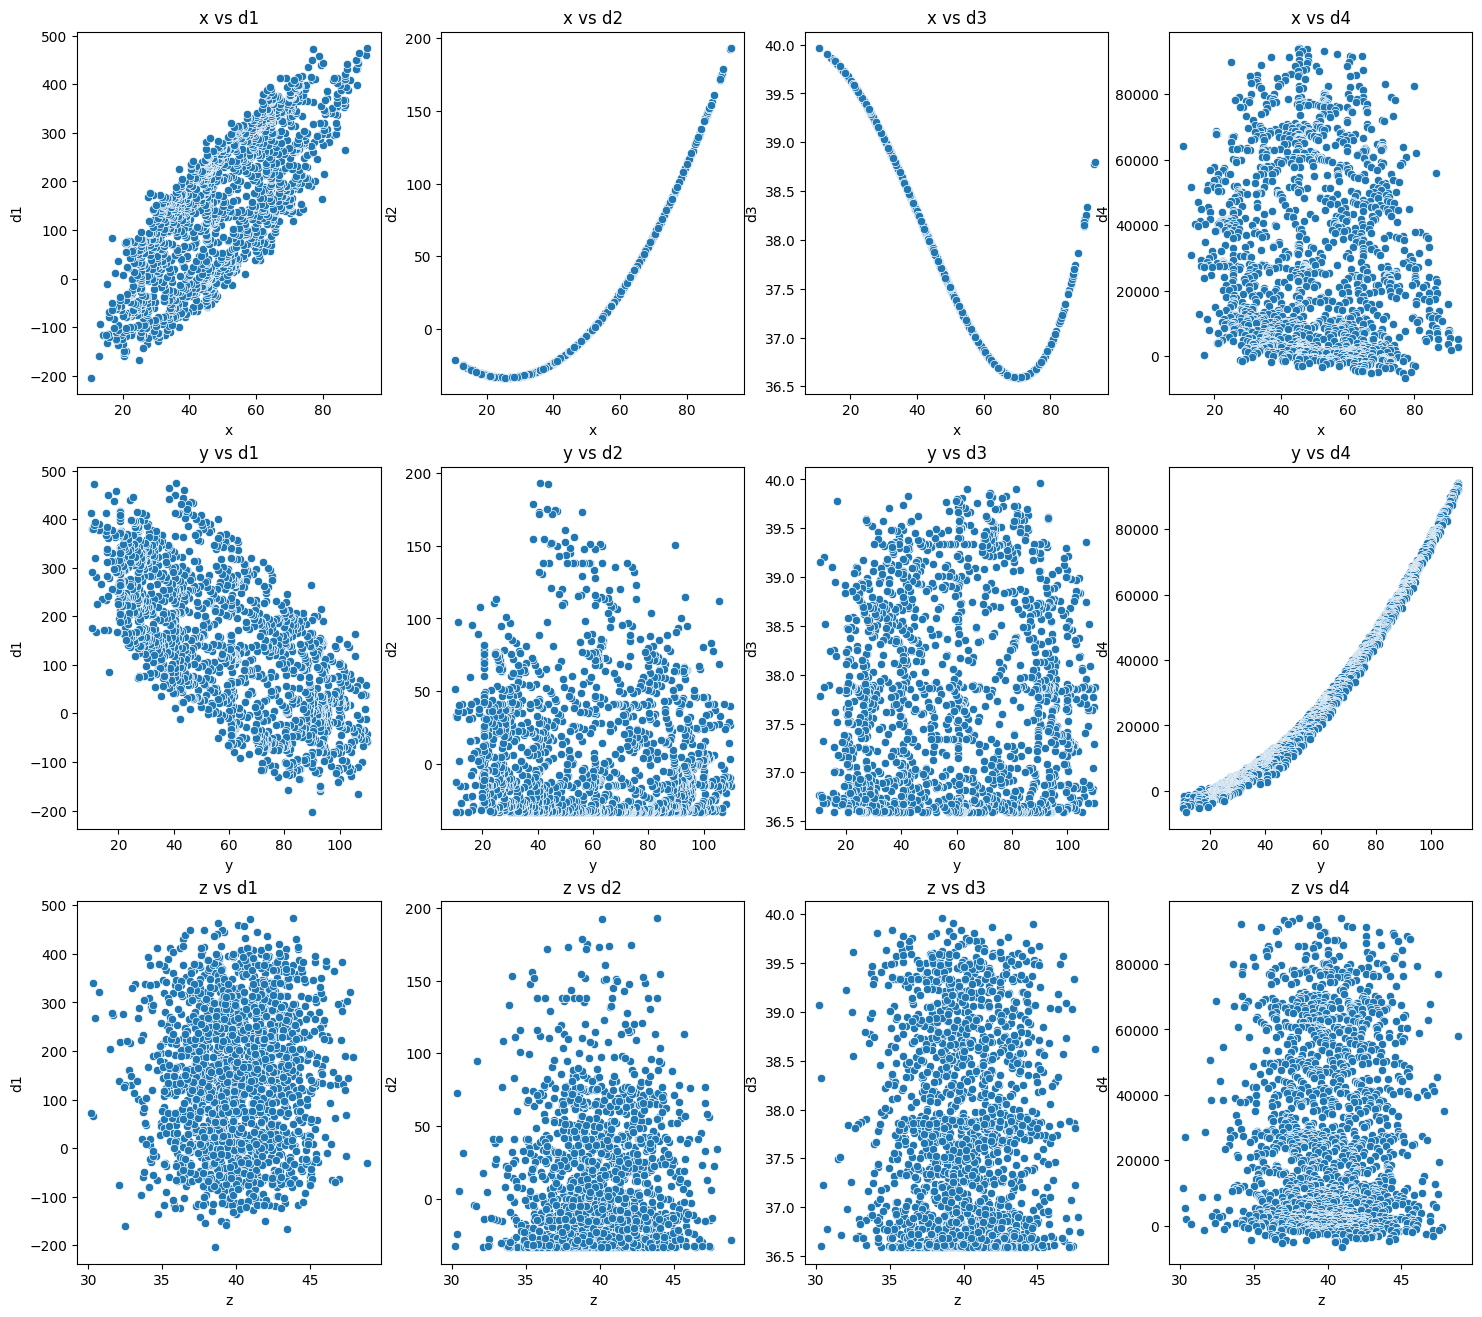

In [7]:
features = ['x', 'y', 'z']
d1_to_d4 = ['d1', 'd2', 'd3', 'd4']

#When displaying plots, compare with x,y,z being row and d1-d4 being col
n_row = len(features)
n_col = len(d1_to_d4)

fig, ax = plt.subplots(n_row, n_col, figsize=(18, 16))

for i in range(len(features)):      
    for j in range(len(d1_to_d4)):  
        f = features[i]
        d = d1_to_d4[j]

        sns.scatterplot(x=ds[f], y=ds[d], ax=ax[i, j])
        ax[i, j].set_xlabel(f)
        ax[i, j].set_ylabel(d)
        ax[i, j].set_title(f"{f} vs {d}")

plt.show()

### Data Observations
*   x seems to hold a strong relationship with both d2 and d3. x also seems to have the best relationship with d1   
*   y appears to hold the best relationship when plotted against d4
*   z does not appear to have relationships with the values from d1-d4 as they seem to appear to us as random noise.

NOTE: Initial Idea of partial derivatives in relation to gradients from column names does not seem to hold